<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220315_KMeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# KMeans 군집화(Clustering ) 활용

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


"Annual Income", "Spending Score" 두가지 정보를 가지고 클러스터링

### 전처리(정규화)

In [4]:
from sklearn.preprocessing import MinMaxScaler

# 두가지 feature 대상
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

### KMeans 클러스터링 알고리즘 학습
- 몇개의 그룹으로 군집화 : n_clusters=k
- 실행시마다 결과를 같게하는 랜덤 시드 : random_state=n 

알고리즘 종류, 최대 iteration 횟수 등을 지정할 수 있지만, 위 두가지 인자만 사용

In [5]:
from sklearn.cluster import KMeans

k = 3 # 3가지 군집으로만 나눠보자

model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터를 학습
model.fit(data_scaled)

# 클러스터링 결과 각 데이터가 몇번째 그룹에 속하는지 새로운 컬럼으로 저장
df['cluster'] = model.fit_predict(data_scaled)

### KMeans 군집화 결과 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

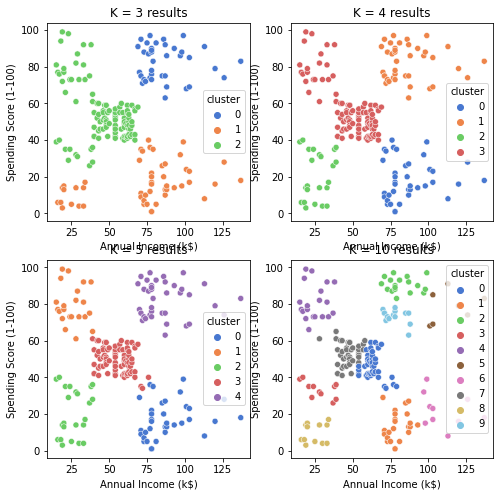

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

k = [3, 4, 5, 10] # 사용 될 군집 수

plt.figure(figsize= (8, 8))

for idx, val in enumerate(k):
  model = KMeans(n_clusters = val, random_state = 10)

  # 정규화된 데이터를 학습
  model.fit(data_scaled)

  # 클러스터링 결과 각 데이터가 몇번째 그룹에 속하는지 새로운 컬럼으로 저장
  df['cluster'] = model.fit_predict(data_scaled)
  
  # 각각의 k 값에 대해 시각화
  plt.subplot(2, 2, idx+1)
  sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['cluster'], palette='muted')
  plt.title("K = {} results".format(val))

### KMeans 클러스터링 k 결정(Elbow Method)
- 조금 더 객관적인 k 결정 방법
- from yellowbrick.cluster import KElbowVisualizer

In [19]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans() # 알고리즘 모델 생성
visualizer = KElbowVisualizer(model, k=(1,10)) # 시각화 모델 생성
# visualizer.fit(data_scaled) # 데이터 학습 # 왜 오류가 나지?

Text(0, 0.5, 'inertia')

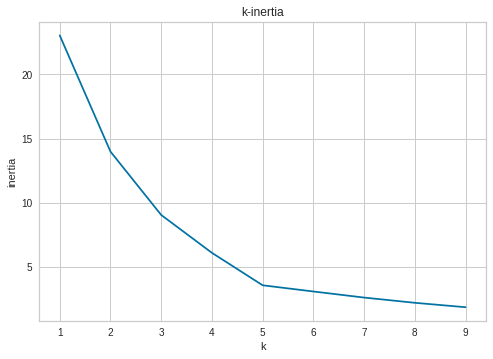

In [8]:
inertia = [] # 군집의 중심점으로 부터 각데이터간의 거리의 제곱의 합
for i in range(1,10):
  model = KMeans(n_clusters=i).fit(data_scaled)
  inertia.append(model.inertia_)
plt.plot(range(1,10), inertia)
plt.title('k-inertia')
plt.xlabel('k')
plt.ylabel('inertia')